# Parcial Final
## Integrantes
- Juan Sebastian Ospina
- Juan Carlos Baez

### Entender el negocio
El dataset contiene tweets realizados por personas frente a su experiencia con una aerolinia, estos estan categorizados con si son buenos malos o neutros frente a su forma de ver la aerolinea
### Entender el dataset
- Estructura:
    - Cada registro se refiere a un Tweet por un usuario
- Atributos:
    - tweet_id: es el id que tiene el Tweet en la base de datos de Twitter
    - airline_sentiment_confidence: Que tanta seguridad se tiene de su sentimiento
    - negativereason: Motivo por el cual fue negativo el sentimiento
    - negativereason_confidence: Que tanta seguridad se tiene que ese fue el verdadero motivo del sentimiento negativo 
    - airline: Que aerolinea fue en la que volo
    - airline_sentiment_gold: 
    - name: Nombre del usuario
    - negativereason_gold
    - retweet_count: cantidad de retweet que se le dio al tweet
    - Text:Contenido del Tweet
    - tweet_coord
    - tweet_created:fecha de creacion
    - tweet_location: ubicacion del tweet
    - user_timezone:zona de donde se realiza el tweet
- Clase:
    - La clase a tomar será airline_sentiment, la cual contiene con que intencion se hace el tweet si fue bueno malo o neutral:
        - Bueno (positive)
        - Malo (negative)
        - Neutral (neutral)

In [1]:

#%pip install pandas
#%pip install nympy
#%pip install matplotlib
#%pip install seaborn
#%pip install nltk
#%pip install wordcloud
%matplotlib inline
#%pip install nltk
#%pip install gensim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import warnings
import seaborn as sns
import string
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from gensim.parsing.preprocessing import remove_stopwords
warnings.filterwarnings('ignore')

nan = np.nan
data = pd.read_csv('USAirlineDS.csv')
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


## Exploracion del data

Realizamos una investigación mas profunda de la información contenida en el data set seleccionado y pudimos obtener esta información relevante:

In [16]:
print(data.isnull().sum()*100/data.shape[0])

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64


Lo primero fue verificar cuantos datos faltantes tenemos por columna en porcentaje, y podemos observar que tenemos una gran cantidad de datos faltantes en lo que es airline_sentiment_gold, negativereason_gold, tweet_coord, dandonos una idea que por la cantidad de datos que faltan pueden ser columnas a descartar.

# Etapa de Preprocesamiento

  Para esta etapa para alivianar el data Set y mejorar el rendimiento vamos a eliminar columnas que no nos van a aportar información, como lo son esas columnas con datos faltantes al ser tan altos se concideran columnas que no nos van a a portar mucha informacion, ademas de columnas como lo es el id del tweet que es un identificador unico, o el nombre de quien hace el tweet por que es informacion muy variable aunque se sabe que existen usuarios con multiplest tweet no es algo que aporte mucho informacion

In [17]:
datapos = data.drop(columns=['tweet_coord', 'negativereason_gold','airline_sentiment_gold','tweet_id','name'])

In [18]:
datapos.shape

(14640, 10)

Una ves listo esto vamos a realizar la limpieza al texto para ello comenzamos con eliminar las citaciones del tweet es decir los @Xxxxx para hacer referencia a otras cuentas, tambien eliminaremos caracteres especiales, ya que no vamos a trabajar con puntuacion o con emojis entonces los removemos, ademas vamos a eliminar las palabras de parada para ello hacemos uso de la libreria gensim que ya nos ayuda con esta funcionalidad, se iban a eliminar tambien las palabras de menos de 3 de longitud pero nos dimos cuenta que palabras como bad son muy utiles y pueden cobrar relevancia, ademas que las palabras de parada ya estan eliminando muchas de esas palabras cortas que no aportan nada de informacion.

In [19]:

stemmer = PorterStemmer()

def cleanarroba(x):
    palabras = re.findall("@[\w]*",x)
    for i in palabras:
        x = x.replace(i,"")
    palabras = re.findall("[^a-zA-Z#]",x)
    for i in palabras:
        x = x.replace(i," ")
    return rootform(remove_stopwords(x))

def rootform(x):
    x = re.sub(' +', ' ', x)
    res = ""
    palabras = x.split()
    for i in palabras:
        if(len(i)>2):
            res += " "+ stemmer.stem(i)
    return  re.sub(' +', ' ', res).strip()
data['text']=data['text'].apply(cleanarroba)
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,what said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plu ad commerci experi tacki,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,today must mean need trip,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,aggress blast obnoxi entertain guest face amp ...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,thank got differ flight chicago,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,leav minut late flight warn commun minut late ...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,pleas bring american airlin #blackberri,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,money chang flight answer phone ani suggest co...,NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


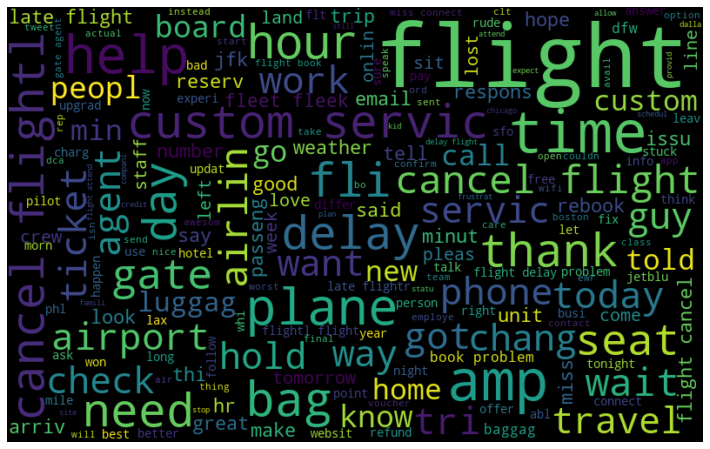

In [26]:
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(" ".join([re.sub(' +', ' ', sentence).strip() for sentence in data['text']]))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

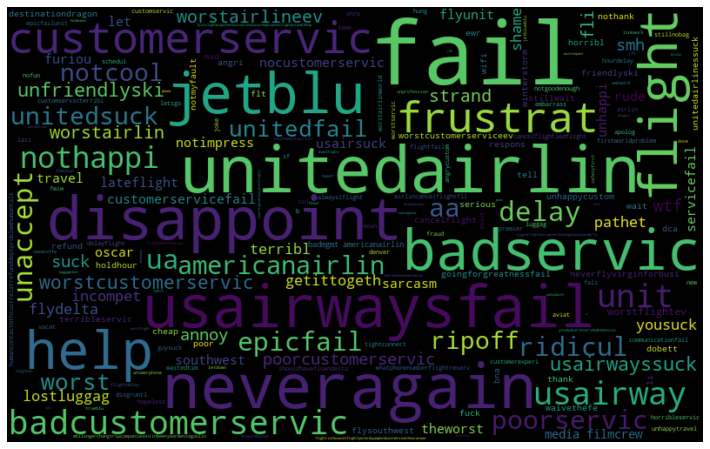

In [21]:
malos = " ".join([str(sentence).replace(" ","") for sentence in data['text'][data['airline_sentiment']=='negative']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(malos)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()